1.Importando bibliotecas

In [248]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from scipy import stats


2.Limpeza e transformação de dados

In [249]:
#transformando o data set em df
df=pd.read_csv('menu.csv')
df


,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,260,87,750,31,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,25,8,770,32,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,45,15,780,33,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,285,95,860,36,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,50,16,880,37,30,10,4,17,2,21,6,0,25,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,Smoothies & Shakes,McFlurry with Oreo Cookies (Small),10.1 oz (285 g),510,150,17.0,26,9.0,44,0.5,45,14,280,12,80,27,1,4,64,12,15,0,40,8
256,Smoothies & Shakes,McFlurry with Oreo Cookies (Medium),13.4 oz (381 g),690,200,23.0,35,12.0,58,1.0,55,19,380,16,106,35,1,5,85,15,20,0,50,10
257,Smoothies & Shakes,McFlurry with Oreo Cookies (Snack),6.7 oz (190 g),340,100,11.0,17,6.0,29,0.0,30,9,190,8,53,18,1,2,43,8,10,0,25,6
258,Smoothies & Shakes,McFlurry with Reese's Peanut Butter Cups (Medium),14.2 oz (403 g),810,290,32.0,50,15.0,76,1.0,60,20,400,17,114,38,2,9,103,21,20,0,60,6


In [250]:
#mostrar todas as colunas do df
pd.set_option('display.max_columns',None)

In [251]:
#aqui vemos que temos que tratar esses dados, além dos vistos antes no df
df.groupby('Category').get_group('Beverages')[['Category', 'Serving Size']]

,Category,Serving Size
110,Beverages,16 fl oz cup
111,Beverages,21 fl oz cup
112,Beverages,30 fl oz cup
113,Beverages,12 fl oz cup
114,Beverages,16 fl oz cup
115,Beverages,21 fl oz cup
116,Beverages,30 fl oz cup
117,Beverages,12 fl oz cup
118,Beverages,16 fl oz cup
119,Beverages,21 fl oz cup


In [252]:
#função pra tratar cada especificidade
def extract_value(row):
    serving_size = row['Serving Size']
    
    # Extrair valor para o formato "X fl oz cup"
    match3 = re.search(r'(\d+) fl oz cup', serving_size)
    if match3:
        value = float(match3.group(1))
        return value * 29.574
    
    # Extrair valor para o formato "X ml"
    match2 = re.search(r'(\d+) ml', serving_size)
    if match2:
        return float(match2.group(1))
    
    # Extrair valor para o formato "X oz (Y g)"
    match4 = re.search(r'(\d+) oz \((\d+) g\)', serving_size)
    if match4:
        return float(match4.group(2))
    # Extrair valor para o formato "X cookie (Y g)"
    match5 = re.search(r'(\d+) cookie \((\d+) g\)', serving_size)
    if match5:
        return float(match5.group(2))
    # Extrair valor para o formato "X fl oz"
    match1 = re.search(r'(\d+\.\d+) fl oz', serving_size)
    if match1:
        value = float(match1.group(1))
        return value * 479.1
    
    return None

# Aplicar a função à coluna 'Serving Size'
df['Serving Size'] = df.apply(extract_value, axis=1)

# Exibir o DataFrame resultante
df

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,136.0,300,120,13.0,20,5.0,25,0.0,260,87,750,31,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,135.0,250,70,8.0,12,3.0,15,0.0,25,8,770,32,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,111.0,370,200,23.0,35,8.0,42,0.0,45,15,780,33,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,161.0,450,250,28.0,43,10.0,52,0.0,285,95,860,36,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,161.0,400,210,23.0,35,8.0,42,0.0,50,16,880,37,30,10,4,17,2,21,6,0,25,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,Smoothies & Shakes,McFlurry with Oreo Cookies (Small),285.0,510,150,17.0,26,9.0,44,0.5,45,14,280,12,80,27,1,4,64,12,15,0,40,8
256,Smoothies & Shakes,McFlurry with Oreo Cookies (Medium),381.0,690,200,23.0,35,12.0,58,1.0,55,19,380,16,106,35,1,5,85,15,20,0,50,10
257,Smoothies & Shakes,McFlurry with Oreo Cookies (Snack),190.0,340,100,11.0,17,6.0,29,0.0,30,9,190,8,53,18,1,2,43,8,10,0,25,6
258,Smoothies & Shakes,McFlurry with Reese's Peanut Butter Cups (Medium),403.0,810,290,32.0,50,15.0,76,1.0,60,20,400,17,114,38,2,9,103,21,20,0,60,6


In [253]:
#verificando se tem NaN
df.isnull().sum()

Category                         0
Item                             0
Serving Size                     0
Calories                         0
Calories from Fat                0
Total Fat                        0
Total Fat (% Daily Value)        0
Saturated Fat                    0
Saturated Fat (% Daily Value)    0
Trans Fat                        0
Cholesterol                      0
Cholesterol (% Daily Value)      0
Sodium                           0
Sodium (% Daily Value)           0
Carbohydrates                    0
Carbohydrates (% Daily Value)    0
Dietary Fiber                    0
Dietary Fiber (% Daily Value)    0
Sugars                           0
Protein                          0
Vitamin A (% Daily Value)        0
Vitamin C (% Daily Value)        0
Calcium (% Daily Value)          0
Iron (% Daily Value)             0
dtype: int64

In [254]:
#verificando as linhas Nan
df[df['Serving Size'].isna()]

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)


3.Análise de dados


3.1 Número itens por categoria

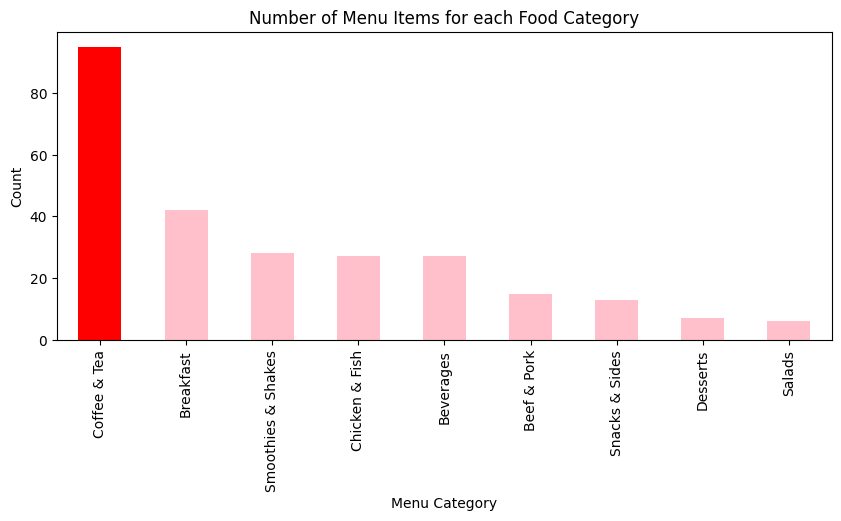

In [255]:
#número de itens por categoria do menu
plt.figure(figsize=(10, 4), dpi=100)
menu_category = df.Category.value_counts()
menu_category.plot.bar(color = ['red','pink','pink','pink','pink','pink','pink','pink','pink'])
plt.title("Number of Menu Items for each Food Category")
plt.ylabel("Count")
plt.xlabel("Menu Category")
plt.xticks(rotation=90)
plt.show()

3.2 Gorduras Totais

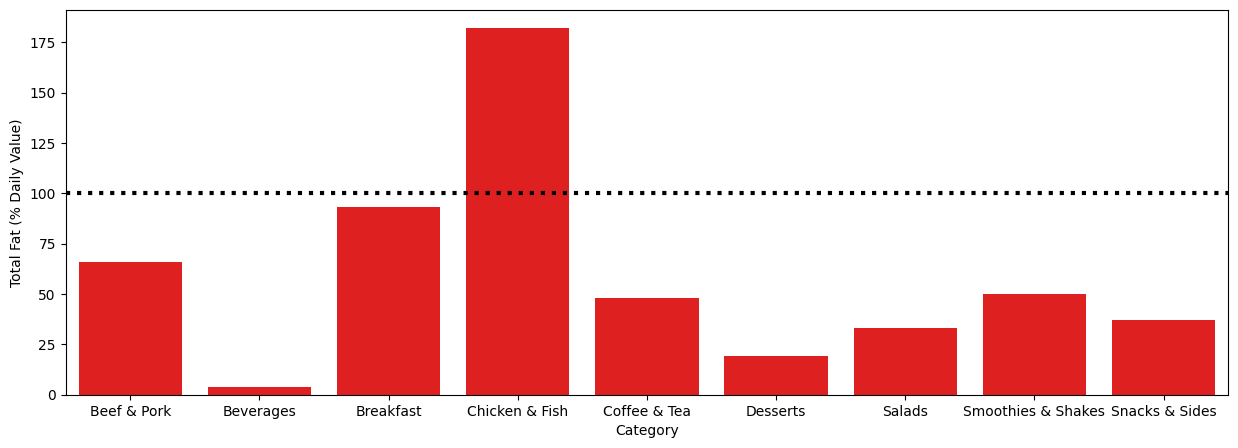

In [256]:
#categoria com o item com o maior percentual de gordura
df1 = pd.pivot_table(df, index='Category', values='Total Fat (% Daily Value)', aggfunc=np.max)
plt.figure(figsize=(15, 5)) 
sns.barplot(x=df1.index, y=df1['Total Fat (% Daily Value)'], color='red')
plt.axhline(y=100, color='black', linestyle='dotted', linewidth=3)
plt.show()

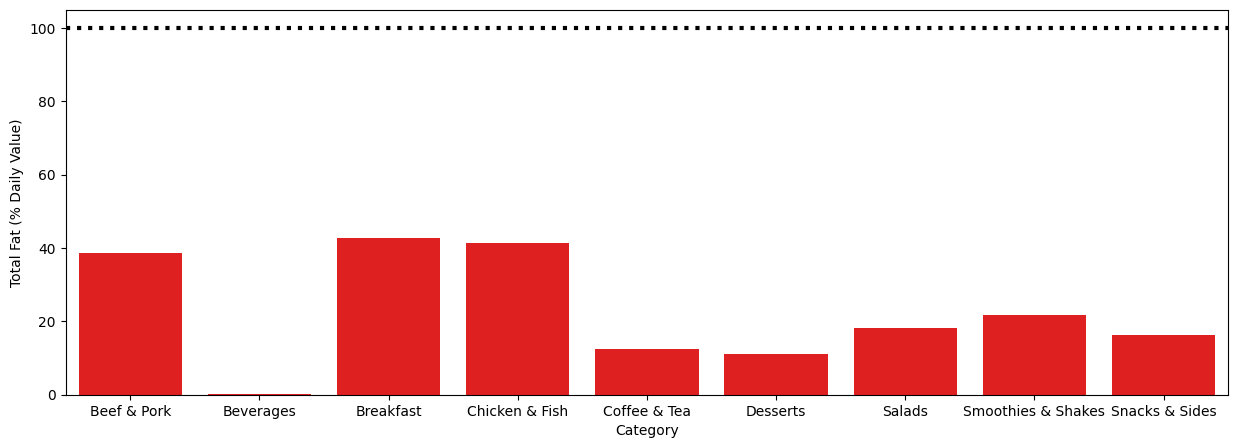

In [257]:
#médias dos índices de gordura por categoria
df1=pd.pivot_table(df,index='Category',values='Total Fat (% Daily Value)',aggfunc=np.mean)
plt.figure(figsize=(15, 5))
sns.barplot(x=df1.index, y=df1['Total Fat (% Daily Value)'], color='red')
plt.axhline(y=100, color='black', linestyle='dotted', linewidth=3)
plt.show()

Percebemos que a categoria de chicken & fish tem alimentos que ultrapassam os 100% que uma pessoa deve consumir diariamente de gordura, mas a categoria que em média tem mais gordura é a breakfast


In [258]:
#alimento mais gorduroso em cada categoria
df2=df.loc[df.groupby('Category')['Total Fat (% Daily Value)'].idxmax()]
df3=df2[['Category','Item','Total Fat (% Daily Value)']]
df3.sort_values('Total Fat (% Daily Value)',ascending=False)

,Category,Item,Total Fat (% Daily Value)
82,Chicken & Fish,Chicken McNuggets (40 piece),182
32,Breakfast,Big Breakfast with Hotcakes (Large Biscuit),93
47,Beef & Pork,Double Quarter Pounder with Cheese,66
253,Smoothies & Shakes,McFlurry with M&M’s Candies (Medium),50
231,Coffee & Tea,Frappé Chocolate Chip (Large),48
98,Snacks & Sides,Large French Fries,37
85,Salads,Premium Bacon Ranch Salad with Crispy Chicken,33
103,Desserts,Baked Apple Pie,19
130,Beverages,1% Low Fat Milk Jug,4


O prato com a mais gordura é os Mc Nuggets, seguido das panquecas e depois do famoso quarteirão que todos amam

In [259]:
#vamos ver os 10 alimentos mais gordurosos do Mc Donalds
df_top10=df[['Category','Item','Total Fat (% Daily Value)']].sort_values(by='Total Fat (% Daily Value)',ascending=False).iloc[0:10,:]
df_top10

,Category,Item,Total Fat (% Daily Value)
82,Chicken & Fish,Chicken McNuggets (40 piece),182
32,Breakfast,Big Breakfast with Hotcakes (Large Biscuit),93
81,Chicken & Fish,Chicken McNuggets (20 piece),91
31,Breakfast,Big Breakfast with Hotcakes (Regular Biscuit),87
28,Breakfast,Big Breakfast (Large Biscuit),80
34,Breakfast,Big Breakfast with Hotcakes and Egg Whites (La...,77
27,Breakfast,Big Breakfast (Regular Biscuit),73
33,Breakfast,Big Breakfast with Hotcakes and Egg Whites (Re...,70
47,Beef & Pork,Double Quarter Pounder with Cheese,66
30,Breakfast,Big Breakfast with Egg Whites (Large Biscuit),63


In [260]:
#ver a quantidade de itens do top 10 em cada categoria
df_top10.groupby('Category').size().sort_values(ascending=False)

Category
Breakfast         7
Chicken & Fish    2
Beef & Pork       1
dtype: int64

Apesar da categoria Chicken & Fish possuir o alimento com o maior índice de gordura, é a categoria "Breskfast" que possui a maioria dos itens do top 10, com 7 pratos.

3.3 Comparar com outro Data set

In [261]:
#transformando o data set em um df - nele possui os mais diversos tipos de alimentos, é bem variado
df_normal=pd.read_csv('nutrition.csv',index_col='name')
df_normal.head()

,Unnamed: 0,serving_size,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,folic_acid,niacin,pantothenic_acid,riboflavin,thiamin,vitamin_a,vitamin_a_rae,carotene_alpha,carotene_beta,cryptoxanthin_beta,lutein_zeaxanthin,lucopene,vitamin_b12,vitamin_b6,vitamin_c,vitamin_d,vitamin_e,tocopherol_alpha,vitamin_k,calcium,copper,irom,magnesium,manganese,phosphorous,potassium,selenium,zink,protein,alanine,arginine,aspartic_acid,cystine,glutamic_acid,glycine,histidine,hydroxyproline,isoleucine,leucine,lysine,methionine,phenylalanine,proline,serine,threonine,tryptophan,tyrosine,valine,carbohydrate,fiber,sugars,fructose,galactose,glucose,lactose,maltose,sucrose,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Cornstarch,0,100 g,381,0.1g,NaN,0,9.00 mg,0.4 mg,0.00 mcg,0.00 mcg,0.000 mg,0.000 mg,0.000 mg,0.000 mg,0.00 IU,0.00 mcg,0.00 mcg,0.00 mcg,0.00 mcg,0.00 mcg,0,0.00 mcg,0.000 mg,0.0 mg,0.00 IU,0.00 mg,0.00 mg,0.0 mcg,2.00 mg,0.050 mg,0.47 mg,3.00 mg,0.053 mg,13.00 mg,3.00 mg,2.8 mcg,0.06 mg,0.26 g,0.019 g,0.012 g,0.020 g,0.006 g,0.053 g,0.009 g,0.008 g,0,0.010 g,0.036 g,0.006 g,0.006 g,0.013 g,0.024 g,0.012 g,0.009 g,0.001 g,0.010 g,0.014 g,91.27 g,0.9 g,0.00 g,0,0,0,0,0,0,0.05 g,0.009 g,0.016 g,0.025 g,0.00 mg,0.0 g,0.09 g,0.00 mg,0.00 mg,8.32 g
"Nuts, pecans",1,100 g,691,72g,6.2g,0,0.00 mg,40.5 mg,22.00 mcg,0.00 mcg,1.167 mg,0.863 mg,0.130 mg,0.660 mg,56.00 IU,3.00 mcg,0.00 mcg,29.00 mcg,9.00 mcg,17.00 mcg,0,0.00 mcg,0.210 mg,1.1 mg,0.00 IU,1.40 mg,1.40 mg,3.5 mcg,70.00 mg,1.200 mg,2.53 mg,121.00 mg,4.500 mg,277.00 mg,410.00 mg,3.8 mcg,4.53 mg,9.17 g,0.397 g,1.177 g,0.929 g,0.152 g,1.829 g,0.453 g,0.262 g,0,0.336 g,0.598 g,0.287 g,0.183 g,0.426 g,0.363 g,0.474 g,0.306 g,0.093 g,0.215 g,0.411 g,13.86 g,9.6 g,3.97 g,0.04 g,0,0.04 g,0.00 g,0.00 g,3.90 g,71.97 g,6.180 g,40.801 g,21.614 g,0.00 mg,0.0 g,1.49 g,0.00 mg,0.00 mg,3.52 g
"Eggplant, raw",2,100 g,25,0.2g,NaN,0,2.00 mg,6.9 mg,22.00 mcg,0.00 mcg,0.649 mg,0.281 mg,0.037 mg,0.039 mg,23.00 IU,1.00 mcg,0.00 mcg,14.00 mcg,0.00 mcg,36.00 mcg,0,0.00 mcg,0.084 mg,2.2 mg,0.00 IU,0.30 mg,0.30 mg,3.5 mcg,9.00 mg,0.081 mg,0.23 mg,14.00 mg,0.232 mg,24.00 mg,229.00 mg,0.3 mcg,0.16 mg,0.98 g,0.051 g,0.057 g,0.164 g,0.006 g,0.186 g,0.041 g,0.023 g,0,0.045 g,0.064 g,0.047 g,0.011 g,0.043 g,0.043 g,0.042 g,0.037 g,0.009 g,0.027 g,0.053 g,5.88 g,3.0 g,3.53 g,1.54 g,0,1.58 g,0,0,0.26 g,0.18 g,0.034 g,0.016 g,0.076 g,0.00 mg,0.0 g,0.66 g,0.00 mg,0.00 mg,92.30 g
"Teff, uncooked",3,100 g,367,2.4g,0.4g,0,12.00 mg,13.1 mg,0,0,3.363 mg,0.942 mg,0.270 mg,0.390 mg,9.00 IU,0.00 mcg,0.00 mcg,5.00 mcg,0.00 mcg,66.00 mcg,0,0,0.482 mg,0,0,0.08 mg,0.08 mg,1.9 mcg,180.00 mg,0.810 mg,7.63 mg,184.00 mg,9.240 mg,429.00 mg,427.00 mg,4.4 mcg,3.63 mg,13.30 g,0.747 g,0.517 g,0.820 g,0.236 g,3.349 g,0.477 g,0.301 g,0,0.501 g,1.068 g,0.376 g,0.428 g,0.698 g,0.664 g,0.622 g,0.510 g,0.139 g,0.458 g,0.686 g,73.13 g,8.0 g,1.84 g,0.47 g,0.00 g,0.73 g,0.00 g,0.01 g,0.62 g,2.38 g,0.449 g,0.589 g,1.071 g,0,0,2.37 g,0,0,8.82 g
"Sherbet, orange",4,100 g,144,2g,1.2g,1mg,46.00 mg,7.7 mg,4.00 mcg,0.00 mcg,0.063 mg,0.224 mg,0.097 mg,0.027 mg,46.00 IU,12.00 mcg,0.00 mcg,1.00 mcg,5.00 mcg,7.00 mcg,0,0.13 mcg,0.023 mg,2.3 mg,0.00 IU,0.01 mg,0.01 mg,0.0 mcg,54.00 mg,0.028 mg,0.14 mg,8.00 mg,0.011 mg,40.00 mg,96.00 mg,1.5 mcg,0.48 mg,1.10 g,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30.40 g,1.3 g,24.32 g,0,0,0,0,0,0,2.00 g,1.160 g,0.530 g,0.080 g,1.00 mg,0.0 g,0.40 g,0.00 mg,0.00 mg,66.10 g


3.4 Limpeza do df_normal

In [262]:
#exclui a coluna unammed
df_normal= df_normal.loc[:, ~df_normal.columns.str.contains('^Unnamed')]

In [263]:
#transforma o 'name' em índice
df_normal.set_index('name',inplace=True)

KeyError: "None of ['name'] are in the columns"

In [ ]:
#substitui valores NaN por zero
df_normal.fillna(0,inplace=True)

In [ ]:
#transformar tds os dados em str para terem o método "endswith", já que algumas colunas são int
df_normal=df_normal.astype(str)

In [ ]:
#função para remover mg,g e mcg
def remove_letras_e_converte(valor):
    if valor.endswith('mg'):
        novo = float(re.sub(r'[a-zA-Z]+$', '', valor)) / 1000  
    elif valor.endswith('mcg'):
        novo = float(re.sub(r'[a-zA-Z]+$', '', valor)) / 1000000
    else:
        novo = float(re.sub(r'[a-zA-Z]+$', '', valor)) 
    return novo

In [ ]:
#limpar o df com essa função para todas as colunas
for column in df_normal.columns:
    df_normal[column] = df_normal[column].apply(remove_letras_e_converte)
df_normal.head()

,serving_size,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,folic_acid,niacin,pantothenic_acid,riboflavin,thiamin,vitamin_a,vitamin_a_rae,carotene_alpha,carotene_beta,cryptoxanthin_beta,lutein_zeaxanthin,lucopene,vitamin_b12,vitamin_b6,vitamin_c,vitamin_d,vitamin_e,tocopherol_alpha,vitamin_k,calcium,copper,irom,magnesium,manganese,phosphorous,potassium,selenium,zink,protein,alanine,arginine,aspartic_acid,cystine,glutamic_acid,glycine,histidine,hydroxyproline,isoleucine,leucine,lysine,methionine,phenylalanine,proline,serine,threonine,tryptophan,tyrosine,valine,carbohydrate,fiber,sugars,fructose,galactose,glucose,lactose,maltose,sucrose,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Cornstarch,100.0,381.0,0.1,0.0,0.000,0.009,0.0004,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000e+00,0.000000,0.0000,0.0,0.00000,0.00000,0.000000,0.002,0.000050,0.00047,0.003,0.000053,0.013,0.003,2.800000e-06,0.00006,0.26,0.019,0.012,0.020,0.006,0.053,0.009,0.008,0.0,0.010,0.036,0.006,0.006,0.013,0.024,0.012,0.009,0.001,0.010,0.014,91.27,0.9,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.05,0.009,0.016,0.025,0.000,0.0,0.09,0.0,0.0,8.32
"Nuts, pecans",100.0,691.0,72.0,6.2,0.000,0.000,0.0405,0.000022,0.0,0.001167,0.000863,0.000130,0.000660,56.0,0.000003,0.0,0.000029,0.000009,0.000017,0.0,0.000000e+00,0.000210,0.0011,0.0,0.00140,0.00140,0.000003,0.070,0.001200,0.00253,0.121,0.004500,0.277,0.410,3.800000e-06,0.00453,9.17,0.397,1.177,0.929,0.152,1.829,0.453,0.262,0.0,0.336,0.598,0.287,0.183,0.426,0.363,0.474,0.306,0.093,0.215,0.411,13.86,9.6,3.97,0.04,0.0,0.04,0.0,0.00,3.90,71.97,6.180,40.801,21.614,0.000,0.0,1.49,0.0,0.0,3.52
"Eggplant, raw",100.0,25.0,0.2,0.0,0.000,0.002,0.0069,0.000022,0.0,0.000649,0.000281,0.000037,0.000039,23.0,0.000001,0.0,0.000014,0.000000,0.000036,0.0,0.000000e+00,0.000084,0.0022,0.0,0.00030,0.00030,0.000003,0.009,0.000081,0.00023,0.014,0.000232,0.024,0.229,3.000000e-07,0.00016,0.98,0.051,0.057,0.164,0.006,0.186,0.041,0.023,0.0,0.045,0.064,0.047,0.011,0.043,0.043,0.042,0.037,0.009,0.027,0.053,5.88,3.0,3.53,1.54,0.0,1.58,0.0,0.00,0.26,0.18,0.034,0.016,0.076,0.000,0.0,0.66,0.0,0.0,92.30
"Teff, uncooked",100.0,367.0,2.4,0.4,0.000,0.012,0.0131,0.000000,0.0,0.003363,0.000942,0.000270,0.000390,9.0,0.000000,0.0,0.000005,0.000000,0.000066,0.0,0.000000e+00,0.000482,0.0000,0.0,0.00008,0.00008,0.000002,0.180,0.000810,0.00763,0.184,0.009240,0.429,0.427,4.400000e-06,0.00363,13.30,0.747,0.517,0.820,0.236,3.349,0.477,0.301,0.0,0.501,1.068,0.376,0.428,0.698,0.664,0.622,0.510,0.139,0.458,0.686,73.13,8.0,1.84,0.47,0.0,0.73,0.0,0.01,0.62,2.38,0.449,0.589,1.071,0.000,0.0,2.37,0.0,0.0,8.82
"Sherbet, orange",100.0,144.0,2.0,1.2,0.001,0.046,0.0077,0.000004,0.0,0.000063,0.000224,0.000097,0.000027,46.0,0.000012,0.0,0.000001,0.000005,0.000007,0.0,1.300000e-07,0.000023,0.0023,0.0,0.00001,0.00001,0.000000,0.054,0.000028,0.00014,0.008,0.000011,0.040,0.096,1.500000e-06,0.00048,1.10,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,30.40,1.3,24.32,0.00,0.0,0.00,0.0,0.00,0.00,2.00,1.160,0.530,0.080,0.001,0.0,0.40,0.0,0.0,66.10


3.5 Normalização do df

In [264]:
#vamo normalizar tds os dados da coluna serving size para 100g
df_normalizado=df
for index,row in df_normalizado.iterrows():
    if row['Serving Size']!=100:
        for column in df_normalizado.columns:
            if column != 'Serving Size' and column !='Item' and column != 'Category':
                df_normalizado.loc[index,column]=(float(row[column])*100)/float(row['Serving Size'])
df_normalizado['Serving Size']=100
df_normalizado.head()
                


,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,100,220.588235,88.235294,9.558824,14.705882,3.676471,18.382353,0.0,191.176471,63.970588,551.470588,22.794118,22.794118,7.352941,2.941176,12.500000,2.205882,12.500000,7.352941,0.0,18.382353,11.029412
1,Breakfast,Egg White Delight,100,185.185185,51.851852,5.925926,8.888889,2.222222,11.111111,0.0,18.518519,5.925926,570.370370,23.703704,22.222222,7.407407,2.962963,12.592593,2.222222,13.333333,4.444444,0.0,18.518519,5.925926
2,Breakfast,Sausage McMuffin,100,333.333333,180.180180,20.720721,31.531532,7.207207,37.837838,0.0,40.540541,13.513514,702.702703,29.729730,26.126126,9.009009,3.603604,15.315315,1.801802,12.612613,7.207207,0.0,22.522523,9.009009
3,Breakfast,Sausage McMuffin with Egg,100,279.503106,155.279503,17.391304,26.708075,6.211180,32.298137,0.0,177.018634,59.006211,534.161491,22.360248,18.633540,6.211180,2.484472,10.559006,1.242236,13.043478,9.316770,0.0,18.633540,9.316770
4,Breakfast,Sausage McMuffin with Egg Whites,100,248.447205,130.434783,14.285714,21.739130,4.968944,26.086957,0.0,31.055901,9.937888,546.583851,22.981366,18.633540,6.211180,2.484472,10.559006,1.242236,13.043478,3.726708,0.0,15.527950,6.211180


3.6 Boxplot com Comparação: Gordura do df_normal Vs. Gordura no menu

In [201]:
#como no df_normal não possui bebidas, nem cafes, nem chas, retiramos esses itens do mc donals para uma comparação justa
df_normalizado_without_drinks=df_normalizado[~df_normalizado['Category'].isin(['Coffee & Tea', 'Beverages'])]
df_normalizado_without_drinks.tail()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
255,Smoothies & Shakes,McFlurry with Oreo Cookies (Small),100,178.947368,52.631579,5.964912,9.122807,3.157895,15.438596,0.175439,15.789474,4.912281,98.245614,4.210526,28.070175,9.473684,0.350877,1.403509,22.456140,4.210526,5.263158,0.0,14.035088,2.807018
256,Smoothies & Shakes,McFlurry with Oreo Cookies (Medium),100,181.102362,52.493438,6.036745,9.186352,3.149606,15.223097,0.262467,14.435696,4.986877,99.737533,4.199475,27.821522,9.186352,0.262467,1.312336,22.309711,3.937008,5.249344,0.0,13.123360,2.624672
257,Smoothies & Shakes,McFlurry with Oreo Cookies (Snack),100,178.947368,52.631579,5.789474,8.947368,3.157895,15.263158,0.000000,15.789474,4.736842,100.000000,4.210526,27.894737,9.473684,0.526316,1.052632,22.631579,4.210526,5.263158,0.0,13.157895,3.157895
258,Smoothies & Shakes,McFlurry with Reese's Peanut Butter Cups (Medium),100,200.992556,71.960298,7.940447,12.406948,3.722084,18.858561,0.248139,14.888337,4.962779,99.255583,4.218362,28.287841,9.429280,0.496278,2.233251,25.558313,5.210918,4.962779,0.0,14.888337,1.488834
259,Smoothies & Shakes,McFlurry with Reese's Peanut Butter Cups (Snack),100,202.970297,74.257426,7.920792,12.376238,3.960396,18.811881,0.000000,14.851485,4.950495,99.009901,3.960396,28.217822,9.405941,0.495050,2.475248,25.247525,4.950495,4.950495,0.0,14.851485,1.980198


In [202]:
#vendo quais são esses outliers
df_normal[df_normal['total_fat']>26].head(10)

,serving_size,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,folic_acid,niacin,pantothenic_acid,riboflavin,thiamin,vitamin_a,vitamin_a_rae,carotene_alpha,carotene_beta,cryptoxanthin_beta,lutein_zeaxanthin,lucopene,vitamin_b12,vitamin_b6,vitamin_c,vitamin_d,vitamin_e,tocopherol_alpha,vitamin_k,calcium,copper,irom,magnesium,manganese,phosphorous,potassium,selenium,zink,protein,alanine,arginine,aspartic_acid,cystine,glutamic_acid,glycine,histidine,hydroxyproline,isoleucine,leucine,lysine,methionine,phenylalanine,proline,serine,threonine,tryptophan,tyrosine,valine,carbohydrate,fiber,sugars,fructose,galactose,glucose,lactose,maltose,sucrose,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"Nuts, pecans",100.0,691.0,72.0,6.2,0.000,0.000,0.0405,0.000022,0.0,0.001167,0.000863,0.000130,0.000660,56.0,0.000003,0.000000,0.000029,0.000009,0.000017,0.0,0.000000e+00,0.000210,0.0011,0.0,0.00140,0.00140,3.500000e-06,0.070,0.001200,0.00253,0.121,0.004500,0.277,0.410,3.800000e-06,0.00453,9.17,0.397,1.177,0.929,0.152,1.829,0.453,0.262,0.0,0.336,0.598,0.287,0.183,0.426,0.363,0.474,0.306,0.093,0.215,0.411,13.86,9.6,3.97,0.04,0.00,0.04,0.00,0.00,3.90,71.97,6.180,40.801,21.614,0.000,0.0,1.49,0.0,0.0,3.52
"Candies, sesame crunch",100.0,516.0,33.0,4.7,0.000,0.167,0.0167,0.000051,0.0,0.003703,0.000033,0.000159,0.000444,6.0,0.000000,0.000000,0.000003,0.000000,0.000000,0.0,0.000000e+00,0.000491,0.0000,0.0,0.00016,0.00016,0.000000e+00,0.639,0.000950,0.00427,0.251,0.001609,0.412,0.307,4.000000e-06,0.00376,11.60,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,50.30,7.7,31.17,0.00,0.00,0.00,0.00,0.00,0.00,33.30,4.662,12.571,14.591,0.000,0.0,2.60,0.0,0.0,2.20
"Nuts, dried, pine nuts",100.0,673.0,68.0,4.9,0.000,0.002,0.0558,0.000034,0.0,0.004387,0.000313,0.000227,0.000364,29.0,0.000001,0.000000,0.000017,0.000000,0.000009,0.0,0.000000e+00,0.000094,0.0008,0.0,0.00933,0.00933,5.390000e-05,0.016,0.001324,0.00553,0.251,0.008802,0.575,0.597,7.000000e-07,0.00645,13.69,0.684,2.413,1.303,0.289,2.926,0.691,0.341,0.0,0.542,0.991,0.540,0.259,0.524,0.673,0.835,0.370,0.107,0.509,0.687,13.08,3.7,3.59,0.07,0.00,0.07,0.00,0.00,3.45,68.37,4.899,18.764,34.071,0.000,0.0,2.59,0.0,0.0,2.28
"Nuts, dried, beechnuts",100.0,576.0,50.0,5.7,0.000,0.038,0.0000,0.000113,0.0,0.000877,0.000925,0.000371,0.000304,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000e+00,0.000684,0.0155,0.0,0.00000,0.00000,0.000000e+00,0.001,0.000670,0.00246,0.000,0.001341,0.000,1.017,0.000000e+00,0.00036,6.20,0.414,0.443,1.071,0.197,0.800,0.319,0.172,0.0,0.245,0.367,0.367,0.146,0.262,0.326,0.310,0.221,0.069,0.172,0.346,33.50,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,50.00,5.719,21.892,20.089,0.000,0.0,3.70,0.0,0.0,6.60
"Butter oil, anhydrous",100.0,876.0,99.0,62.0,0.256,0.002,0.0223,0.000000,0.0,0.000003,0.000010,0.000005,0.000001,3069.0,0.000840,0.000000,0.000193,0.000000,0.000000,0.0,1.000000e-08,0.000001,0.0000,0.0,0.00280,0.00280,8.600000e-06,0.004,0.000001,0.00000,0.000,0.000000,0.003,0.005,0.000000e+00,0.00001,0.28,0.010,0.010,0.021,0.003,0.059,0.006,0.008,0.0,0.017,0.027,0.022,0.007,0.014,0.027,0.015,0.013,0.004,0.014,0.019,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,99.48,61.924,28.732,3.694,0.256,0.0,0.00,0.0,0.0,0.24
"Nuts, glazed, walnuts",100.0,500.0,36.0,3.6,0.000,0.446,0.0000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000e+00,0.000000,0.0000,0.0,0.00000,0.00000,0.000000e+00,0.071,0.000000,0.00129,0.000,0.000000,0.000,0.232,0.000000e+00,0.00000,8.28,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,47.59,3.6,32.14,0.00,0.00,0.00,0.00,0.00,0.00,35.71,3.571,5.357,25.000,0.000,0.0,2.13,0.0,0.0,6.28
"Oil, soybean lecit

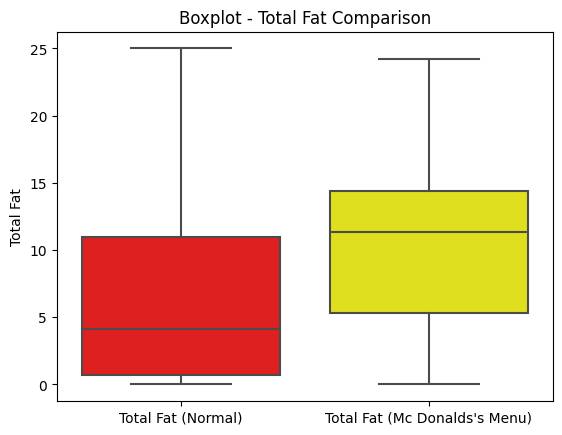

In [203]:
#tirando os outliers que são oleos, margarinas etc que a gente não consome 100g, filtrei a coluna 'total fat' para só os
#alimentos abaixo de 26 de gordura
#comparar os alimentos do data set "nutritrion" e os pratos do breakfast
data = [df_normal[df_normal['total_fat'] < 26]['total_fat'], df_normalizado_without_drinks['Total Fat']]
colors = ['red', 'yellow']

sns.boxplot(data=data, palette=colors)

plt.xticks([0, 1], ['Total Fat (Normal)', "Total Fat (Mc Donalds's Menu)"])
plt.ylabel('Total Fat')
plt.title('Boxplot - Total Fat Comparison')

plt.show()


É evidente que a média de gordura do menu é maior que a do outro data set com as comidas normais, mas como eu posso ter certeza sobre isso? Vamos fazer teste de hipótese

3.7 Teste de Hipótese

In [204]:
statistic, p_value=stats.ttest_ind(df_normal[df_normal['total_fat']<26]['total_fat'],
df_normalizado_without_drinks['Total Fat'])
print("Estatística do teste:", statistic)
print("Valor p:", p_value)

Estatística do teste: -6.518205796603255
Valor p: 7.543495686010121e-11


Como o p-valor deu muito baixo, então, significa que a hipótese de que as médias são diferentes, é verdadeira. E a estatistica como deu um valor alto em termos absolutos, significa o mesmo.

3.8 Calorias

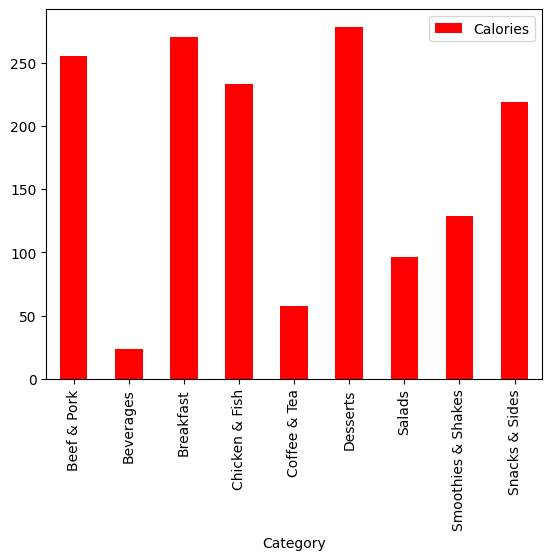

In [39]:
#média de calorias por categoria
df1=pd.pivot_table(df,index='Category',values='Calories',aggfunc=np.mean)
df1.plot.bar(color='red')
plt.show()

Podemos ver que as categorias Breakfast, Beef & Pork, Chicken & Fish estão entre as mais calóricas, e podemos pensar que isso tem relação com o tanto de gordura nelas, já que como foi visto, elas possuem alto grau de gordura. 

3.9 Correlação entre Calorias e Gorduras

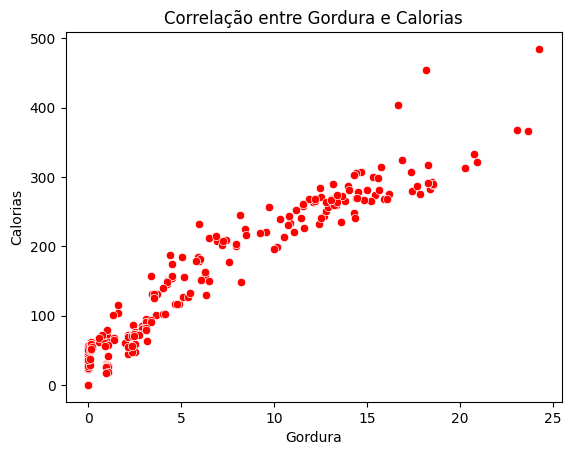

In [40]:
# Plotar o gráfico de dispersão com a correlação entre "gordura" e "calorias"
sns.scatterplot(data=df, x='Total Fat', y='Calories',color='red')

# Definir os rótulos dos eixos x e y
plt.xlabel('Gordura')
plt.ylabel('Calorias')

# Definir o título do gráfico
plt.title('Correlação entre Gordura e Calorias')

# Exibir o gráfico
plt.show()

Percebe-se uma forte relação entre a quantidade de gordura e as calorias dos alimentos desse menu

Mas fica uma dúvida, pq a categoria das sobremesas estão entre as mais calóricas, mas não estão entre as mais gordurosas, o que faz elas serem tão calóricas? Vamos assumir que seja pela quantidade de açucar

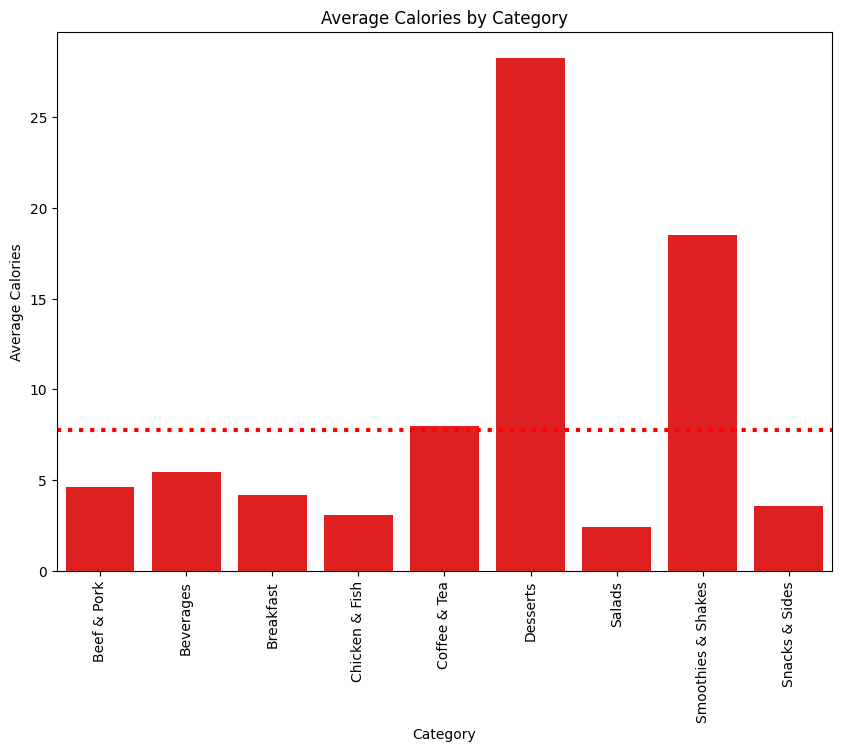

In [41]:
df_sugars = df.groupby('Category')['Sugars'].mean().reset_index()

plt.figure(figsize=(10, 7))
sns.barplot(data=df_sugars, x='Category', y='Sugars', color='red')

# Definir rótulos dos eixos e título do gráfico
plt.xlabel('Category')
plt.ylabel('Average Calories')
plt.title('Average Calories by Category')

plt.xticks(rotation=90)

plt.axhline(y=df['Sugars'].mean(), color='red', linestyle='dotted', linewidth=3)

# Exibir o gráfico
plt.show()

Claramente, as sobremesas tem um índice mt mais alto em média de açucar que as outras categorias, mas os smoothies & shakes também, o que faz as sobremesas serem mais calóricas, é só esssa quantidade adicional de açucar?

3.10 Desserts Vs. Smoothies & Shakes

In [42]:
#fazer tabelinha entre essas duas categorias de tds as colunas em média
df_desserts_shakes=df.loc[df['Category'].isin(['Desserts', 'Smoothies & Shakes'])]
df_desserts_shakes=df_desserts_shakes.groupby(['Category']).agg('mean')
df_desserts_shakes

C:\Users\nartilha\AppData\Local\Temp\ipykernel_23080\1424864974.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_desserts_shakes=df_desserts_shakes.groupby(['Category']).agg('mean')


,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
Category,,,,,,,,,,,,,,,,,,,,,,
Desserts,100.0,278.245111,93.976915,11.039157,16.462979,5.660866,28.519218,0.000000,17.477483,5.648076,170.957911,7.470961,40.871923,13.377164,1.687724,5.619759,28.306310,4.264729,5.524390,4.959246,9.635774,7.812246
Smoothies & Shakes,100.0,128.893753,32.731418,3.608263,5.564625,2.110854,10.497767,0.120364,10.838622,3.530501,46.436253,1.962619,21.491064,7.167013,0.347753,1.370533,18.532301,2.672576,4.352459,1.440001,8.738189,1.072483


In [43]:
#setar só as colunas mais importantes
df_desserts_shakes=df_desserts_shakes.drop(columns='Serving Size')
df_desserts_shakes=df_desserts_shakes[['Total Fat','Saturated Fat','Cholesterol','Sodium','Carbohydrates','Sugars']]

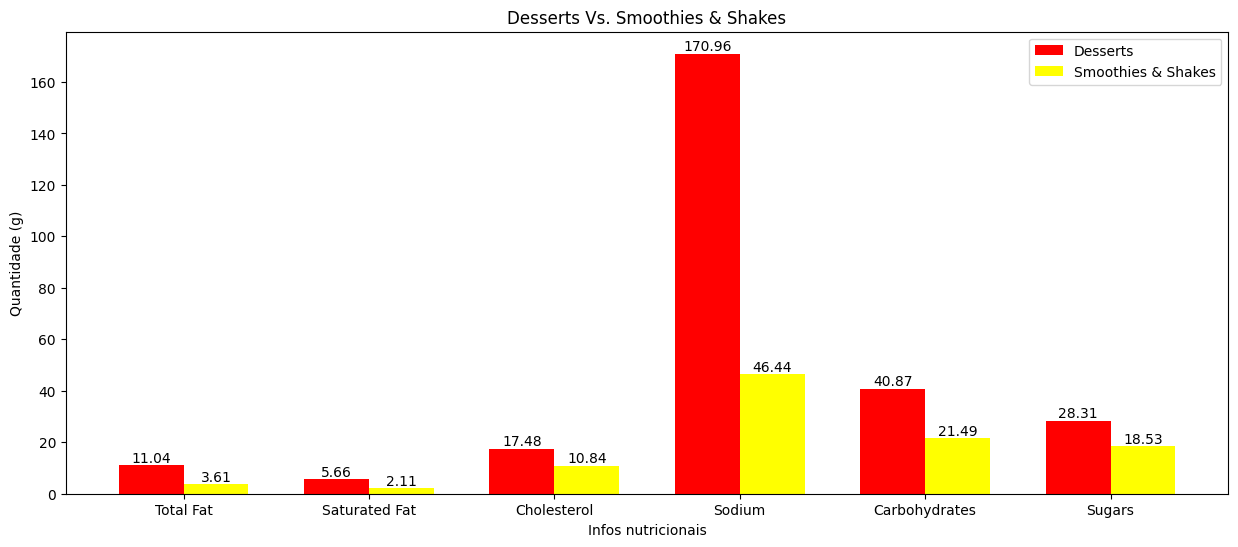

In [44]:
#plotar gráfico comparando cada coluna
rotulos = df_desserts_shakes.columns
indices = np.arange(len(rotulos))
largura_barra = 0.35

fig, ax = plt.subplots(figsize=(15,6))
barras1 = ax.bar(indices - largura_barra/2, df_desserts_shakes.iloc[0], largura_barra, label='Desserts',color='red')
barras2 = ax.bar(indices + largura_barra/2, df_desserts_shakes.iloc[1], largura_barra, label='Smoothies & Shakes',color='yellow')

ax.set_xlabel('Infos nutricionais')
ax.set_ylabel('Quantidade (g)')
ax.set_title('Desserts Vs. Smoothies & Shakes')

ax.set_xticks(indices)
ax.set_xticklabels(rotulos)

for barra1, barra2 in zip(barras1, barras2):
    altura1 = barra1.get_height()
    altura2 = barra2.get_height()
    ax.annotate(f'{round(altura1,2)}', (barra1.get_x() + barra1.get_width() / 2, altura1),
                ha='center', va='bottom')
    ax.annotate(f'{round(altura2,2)}', (barra2.get_x() + barra2.get_width() / 2, altura2),
                ha='center', va='bottom')

ax.legend()

plt.show()

Além da quantidade maior em açucar, o sódio presente nas sobremesas é 4x maior que dos shakes, e a quantidade de carboidratos é 2 vezes maior